학습 횟수 : 0
학습 횟수 : 100
학습 횟수 : 200
학습 횟수 : 300
학습 횟수 : 400
학습 횟수 : 500
학습 횟수 : 600
학습 횟수 : 700
학습 횟수 : 800
학습 횟수 : 900
1000번의 학습 이후의 회귀 알고리즘 결과
beta_0: [0.21056] beta_1: [0.75204095]


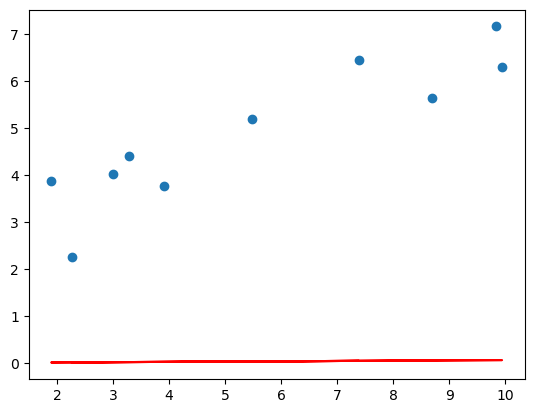

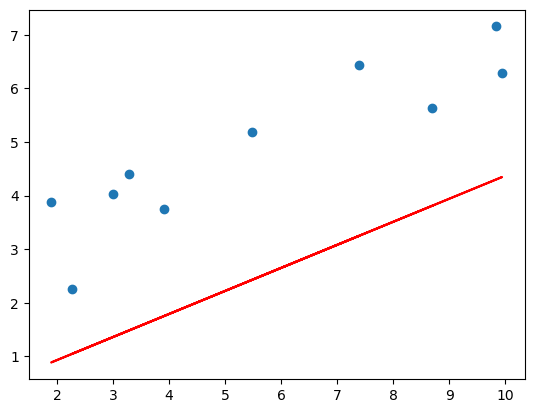

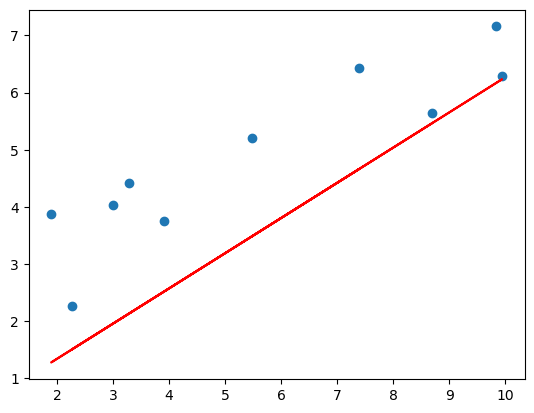

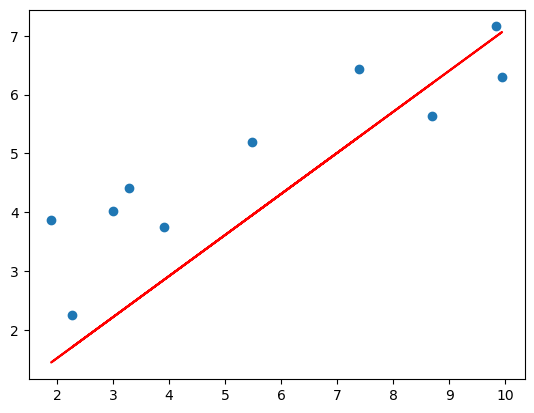

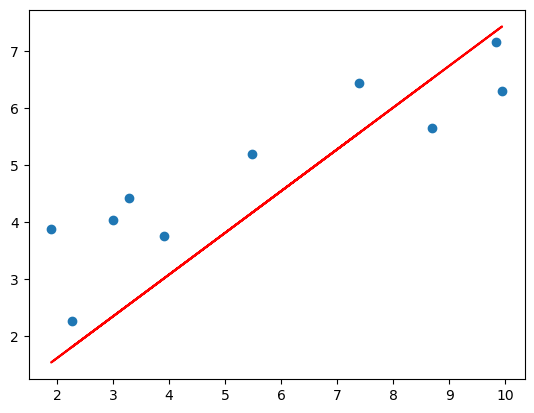

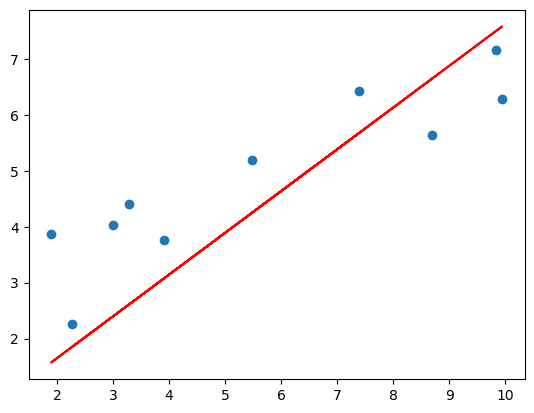

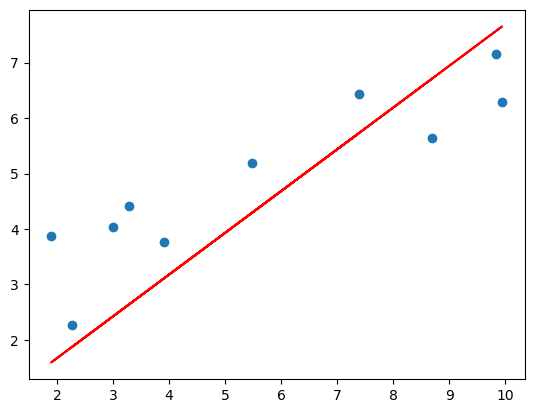

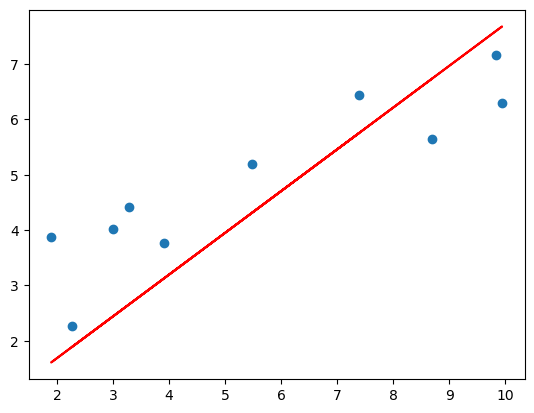

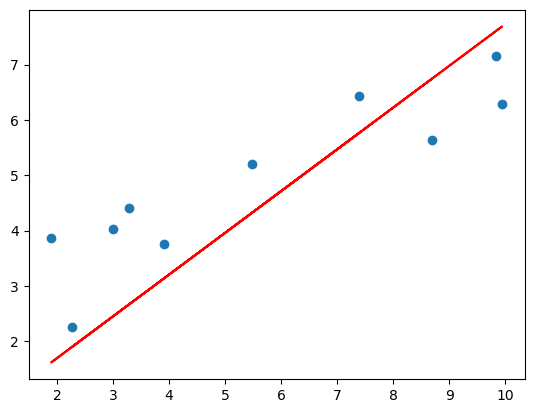

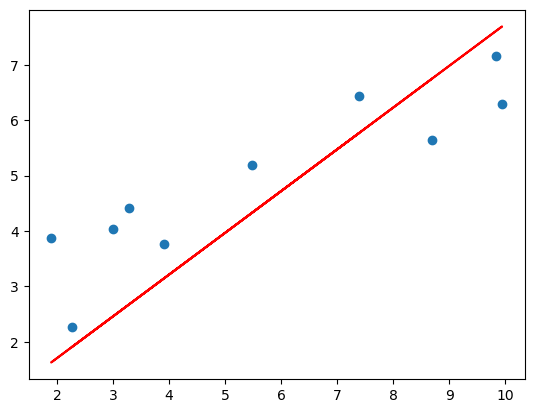

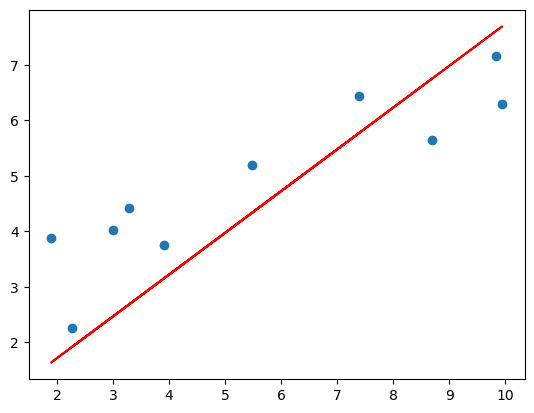

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# 데이터를 생성하고 반환하는 함수입니다.
def load_data():
    
    X = np.array([[8.70153760], [3.90825773], [1.89362433], [3.28730045], [7.39333004], [2.98984649], [2.25757240], [9.84450732], [9.94589513], [5.48321616]])
    y = np.array([[5.64413093], [3.75876583], [3.87233310], [4.40990425], [6.43845020], [4.02827829], [2.26105955], [7.15768995], [6.29097441], [5.19692852]])
    
    return X, y

"""
1.  입력값(X)과 beta_0,beta_1를 바탕으로 
    예측값(pre_y)을 계산하여 반환하는 함수를 구현합니다.
    
    회귀 함수 식을 참고하여
    예측값을 계산합니다.
"""
def prediction(beta_0, beta_1, X):
    
    y_pred = beta_1 * X + beta_0
    
    return y_pred
    

# beta_0와 beta_1 값을 업데이트 하는 규칙을 정의하는 함수입니다.
def update_beta(X, y, y_pred, lr):
    
    delta_0 = -(lr * (2 / len(X)) * np.sum(y - y_pred))
    
    delta_1 = -(lr * (2 / len(X)) * (np.dot(X.T, (y - y_pred))))
    
    return delta_0, delta_1
    

"""
2.  반복 횟수만큼 오차(loss)를 계산하고 
    beta_0,beta_1의 값을 변경하는 함수를 구현합니다.
    
"""
def gradient_descent(X, y, iters, lr):
    
    beta_0 = np.zeros((1,1))
    beta_1 = np.zeros((1,1))
    
    for i in range(iters):
        
        y_pred = prediction(beta_0, beta_1, X)
        loss = np.mean(np.square(y - y_pred))
        
        beta0_delta, beta1_delta = update_beta(X, y, y_pred, lr)
        
        beta_0 -= beta0_delta
        beta_1 -= beta1_delta
        
        # 100번의 학습마다 그래프 출력하기
        if i%100==0:
            print("학습 횟수 :",i)
            plotting_graph(X,y,beta_0,beta_1)
        
    return beta_0, beta_1


# 그래프를 시각화하는 함수입니다.
def plotting_graph(X,y,beta_0,beta_1):
    
    y_pred = beta_0 + beta_1[0,0] * X
    
    fig = plt.figure()
    
    plt.scatter(X, y)
    plt.plot(X, y_pred,c='r')
    
    plt.savefig("test.png")


# 회귀 알고리즘 구현 진행을 위한 main() 함수입니다.  
def main():
    
    # 학습을 위해 필요한 파라미터입니다. 
    lr = 1e-4
    iteration = 1000
    
    X, y = load_data()
    
    beta_0, beta_1 = gradient_descent(X, y, iteration, lr)
    
    print("{}번의 학습 이후의 회귀 알고리즘 결과".format(iteration))
    print("beta_0:",beta_0[0], "beta_1:",beta_1[0])
    
    plotting_graph(X,y,beta_0,beta_1)
    
    return beta_0, beta_1

if __name__=="__main__":
    main()


> beta_0 :  [2.89804615]
> beta_1 :  [[2.90298892]]
> 모델 평가 점수 : 0.8948735905242706


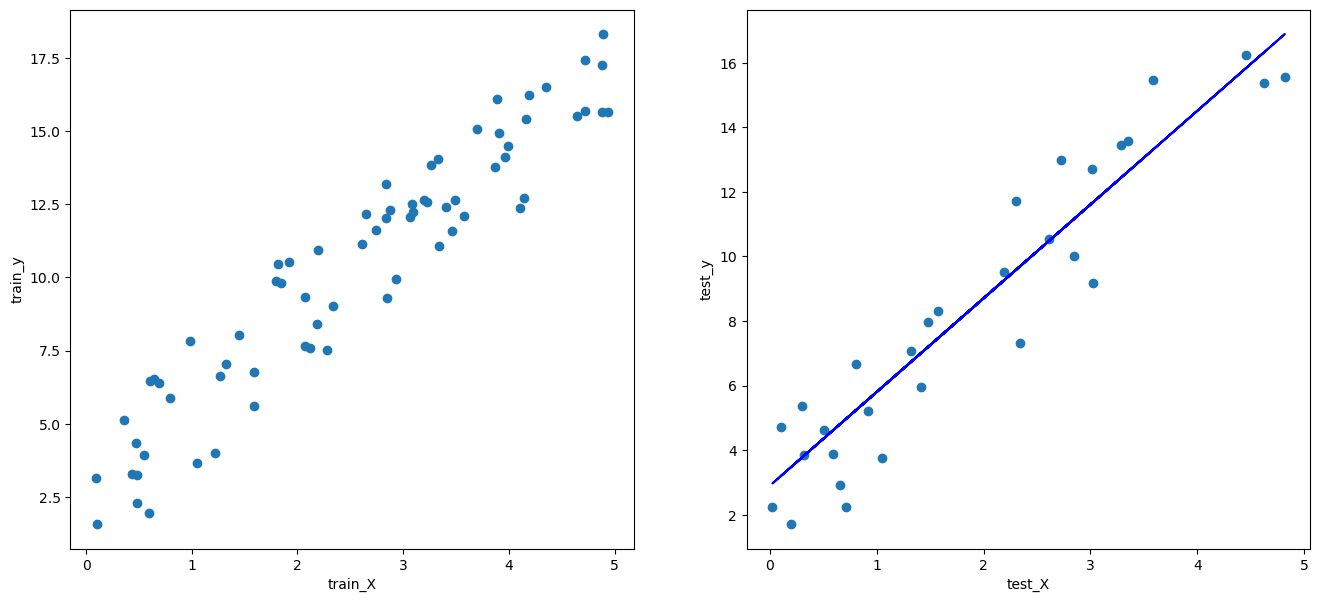

In [3]:
import matplotlib.pyplot as plt
import numpy as np


# 데이터를 분리하는 모듈을 불러옵니다.
from sklearn.model_selection import train_test_split

# 사이킷런에 구현되어 있는 회귀 모델을 불러옵니다.
from sklearn.linear_model import LinearRegression

"""
1. 데이터를 생성하고, 
   생성한 데이터를 
   학습용 데이터와 테스트용 데이터로 분리하여 
   반환하는 함수를 구현합니다.
"""
def load_data():
    
    np.random.seed(0)
    
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.3, random_state= 0)
    
    return train_X, test_X, train_y, test_y

"""
2. 단순 선형회귀 모델을 불러오고, 
   불러온 모델을 학습용 데이터에 
   맞추어 학습시킨 후
   테스트 데이터에 대한 
   예측값을 반환하는 함수를 구현합니다.
"""
def regression_model(train_X, train_y):
    
    simplelinear = LinearRegression()
    
    simplelinear.fit(train_X, train_y)
    
    return simplelinear
    
# 그래프를 시각화하는 함수입니다.
def plotting_graph(train_X, test_X, train_y, test_y, predicted):
    fig, ax = plt.subplots(1,2, figsize=(16, 7))
    
    ax[0].scatter(train_X,train_y)
    ax[1].scatter(test_X,test_y)
    ax[1].plot(test_X, predicted, color='b')
    
    ax[0].set_xlabel('train_X')
    ax[0].set_ylabel('train_y')
    ax[1].set_xlabel('test_X')
    ax[1].set_ylabel('test_y')
    
    fig.savefig("result.png")
    
"""
3. 모델 학습 및 예측 결과 확인을 위한 
   main() 함수를 완성합니다.
"""
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    simplelinear = regression_model(train_X, train_y)
    
    predicted = simplelinear.predict(test_X)
    
    model_score = simplelinear.score(test_X, test_y)
    
    beta_0 = simplelinear.intercept_
    beta_1 = simplelinear.coef_
    
    print("> beta_0 : ",beta_0)
    print("> beta_1 : ",beta_1)
    
    print("> 모델 평가 점수 :", model_score)
    
    # 시각화 함수 호출하기
    plotting_graph(train_X, test_X, train_y, test_y, predicted)
    
    return predicted, beta_0, beta_1, model_score
    
    
if __name__=="__main__":
    main()


In [15]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
# boston 데이터를 위한 모듈을 불러옵니다. 
# from sklearn.datasets import load_boston

"""
1. 사이킷런에 존재하는 데이터를 불러오고, 
   불러온 데이터를 학습용 데이터와 테스트용 데이터로
   분리하여 반환하는 함수를 구현합니다.
"""
def load_bo():  
	data_url="http://lib.stat.cmu.edu/datasets/boston"  
	raw_df=pd.read_csv(data_url,sep="\s+",skiprows=22,header=None)  
	X=np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])  
	y=raw_df.values[1::2,2]  
	#X, y = load_boston(return_X_y = True)  
	feature_names=np.array(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD', 'TAX','PTRATIO','B','LSTAT'], dtype='<U7')

	return X,y

def load_data():
    
    X, y  = load_bo()
     
    print("데이터의 입력값(X)의 개수 :", X.shape[1])
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state= 100)
    
    return train_X, test_X, train_y, test_y
    
"""
2. 다중 선형회귀 모델을 불러오고, 
   불러온 모델을 학습용 데이터에 맞추어 학습시킨 후
   해당 모델을 반환하는 함수를 구현합니다.

"""
def Multi_Regression(train_X,train_y):
    
    multilinear = LinearRegression()
    
    multilinear.fit(train_X, train_y)
    
    return multilinear
    
"""
3. 모델 학습 및 예측 결과 확인을 위한 main 함수를 완성합니다.
"""
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    multilinear = Multi_Regression(train_X,train_y)
    
    predicted = multilinear.predict(test_X)
    
    model_score = multilinear.score(test_X, test_y)
    
    print("\n> 모델 평가 점수 :", model_score)
     
    beta_0 = multilinear.intercept_
    beta_i_list = multilinear.coef_
    
    print("\n> beta_0 : ",beta_0)
    print("> beta_i_list : ",beta_i_list)
    
    return predicted, beta_0, beta_i_list, model_score
    
if __name__ == "__main__":
    main()


<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
C:\Users\302-28\AppData\Local\Temp\ipykernel_26004\3297177049.py:17: SyntaxWarning: invalid escape sequence '\s'
  raw_df=pd.read_csv(data_url,sep="\s+",skiprows=22,header=None)


데이터의 입력값(X)의 개수 : 13

> 모델 평가 점수 : 0.755503308687131

> beta_0 :  36.333770285507924
> beta_i_list :  [-8.14896492e-02  4.80407782e-02 -5.47150249e-03  3.06260576e+00
 -1.61368815e+01  3.67245067e+00 -8.51525259e-03 -1.51740854e+00
  2.87271007e-01 -1.21207598e-02 -9.24160757e-01  9.53460812e-03
 -4.85895548e-01]


변환 이후 X 데이터
 [[1.         2.64644051 7.00364738]
 [1.         3.1455681  9.89459867]
 [1.         2.80829013 7.88649344]]


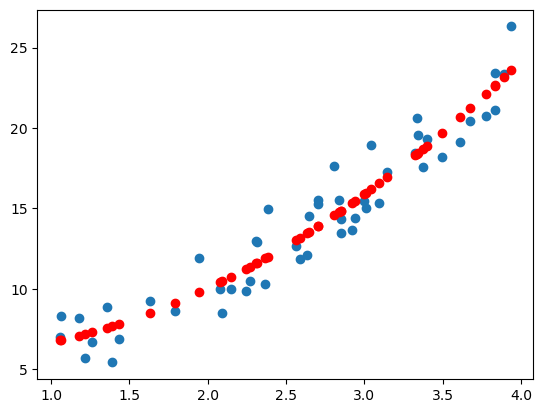

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 다항 회귀의 입력값을 변환하기 위한 모듈을 불러옵니다.
from sklearn.preprocessing import PolynomialFeatures

def load_data():
    
    np.random.seed(0)
    
    X = 3*np.random.rand(50, 1) + 1
    y = X**2 + X + 2 +5*np.random.rand(50,1)
    
    return X, y
    
"""
1. PolynomialFeature 객체를 활용하여 
   각 변수 값을 제곱하고, 
   데이터에 추가하는 함수를 구현합니다.
"""

def Polynomial_transform(X):
    
    poly_feat = PolynomialFeatures(degree= 2,include_bias= True)
    
    poly_X = poly_feat.fit_transform(X)
    
    print("변환 이후 X 데이터\n",poly_X[:3])
    
    return poly_X
    
"""
2. 다중 선형회귀 모델을 불러오고, 
   불러온 모델을 학습용 데이터에 맞추어 
   학습시킨 후 해당 모델을 반환하는 
   함수를 구현합니다.
"""

def Multi_Regression(poly_x, y):
    
    multilinear = LinearRegression()
    
    multilinear.fit(poly_x, y)
    
    return multilinear
    
    
# 그래프를 시각화하는 함수입니다.
def plotting_graph(x,y,predicted):
    fig = plt.figure()
    plt.scatter(x, y)
    
    plt.scatter(x, predicted,c='r')
    plt.savefig("test.png")
    
    
"""
3. 모델 학습 및 예측 결과 확인을 위한 
   main 함수를 완성합니다.
   
   학습이 완료된 모델을 활용하여 
   테스트 데이터에 대한 예측을 수행합니다.
"""
def main():
    
    X,y = load_data()
    
    poly_x = Polynomial_transform(X)
    
    linear_model = Multi_Regression(poly_x,y)
    
    predicted = linear_model.predict(poly_x)
    
    plotting_graph(X,y,predicted)
    
    return predicted
    
if __name__=="__main__":
    main()


In [17]:
import numpy as np

from sklearn.model_selection import train_test_split

#from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

# sklearn의 KFold 모듈 불러오기
from sklearn.model_selection import KFold

"""
1. 사이킷런에 존재하는 데이터를 불러오고, 
   불러온 데이터를 학습용 데이터와 테스트용 데이터로 
   분리하여 반환하는 함수를 구현합니다.
"""
def load_bo():  
	data_url="http://lib.stat.cmu.edu/datasets/boston"  
	raw_df=pd.read_csv(data_url,sep="\s+",skiprows=22,header=None)  
	X=np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])  
	y=raw_df.values[1::2,2]  
	#X, y = load_boston(return_X_y = True)  
	feature_names=np.array(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD', 'TAX','PTRATIO','B','LSTAT'], dtype='<U7')

	return X,y    

def load_data():
    
    X, y = load_bo()
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state= 100)
    
    return train_X, test_X, train_y, test_y


"""
2. K-fold 교차 검증을 통한 
   모델 학습 및 예측 수행을 진행할 함수를 구현합니다.
"""
def kfold_regression(train_X, train_y):
    
    # 반복문 내에서 횟수를 표시하기 위한 변수 설정하기
    n_iter = 0
    
    # 각 fold 마다 모델 검증 점수를 저장하기 위한 빈 리스트 생성하기
    model_scores = []
    
    kfold = KFold(n_splits= 5)
    
    for train_idx, val_idx in kfold.split(train_X):
        
        X_train, X_val = train_X[train_idx], train_X[val_idx]
        y_train, y_val = train_y[train_idx], train_y[val_idx]
        
        # 동일한 가중치 사용을 위해 각 fold 마다 모델 초기화 하기
        model = LinearRegression()
        
        model.fit(X_train, y_train)
        
        # 각 Iter 별 모델 평가 점수 측정
        score = model.score(X_val, y_val)
        
        # 학습용 데이터의 크기를 저장합니다.
        train_size = X_train.shape[0]
        val_size = X_val.shape[0]
    
        print("Iter : {0} Cross-Validation Accuracy : {1}, Train Data 크기 : {2}, Validation Data 크기 : {3}"
              .format(n_iter, score, train_size, val_size))
    
        n_iter += 1
        
        # 전체 모델 점수를 저장하는 리스트에 추가하기
        model_scores.append(score)
        
    return kfold, model, model_scores
        
        
def main():
    
    # 학습용 데이터와 테스트 데이터 불러오기
    train_X, test_X, train_y, test_y = load_data()
    
    # KFold 교차 검증을 통한 학습 결과와 회귀 모델을 반환하는 함수 호출하기
    kfold, model, model_scores = kfold_regression(train_X, train_y)
    
    # 전체 성능 점수의 평균 점수 출력
    print("\n> 평균 검증 모델 점수 : ", np.mean(model_scores))
    

    
if __name__ == "__main__":
    main()


<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
C:\Users\302-28\AppData\Local\Temp\ipykernel_26004\891508950.py:18: SyntaxWarning: invalid escape sequence '\s'
  raw_df=pd.read_csv(data_url,sep="\s+",skiprows=22,header=None)


Iter : 0 Cross-Validation Accuracy : 0.6225277546797325, Train Data 크기 : 323, Validation Data 크기 : 81
Iter : 1 Cross-Validation Accuracy : 0.7158099616179278, Train Data 크기 : 323, Validation Data 크기 : 81
Iter : 2 Cross-Validation Accuracy : 0.7986314390280329, Train Data 크기 : 323, Validation Data 크기 : 81
Iter : 3 Cross-Validation Accuracy : 0.6952286567450758, Train Data 크기 : 323, Validation Data 크기 : 81
Iter : 4 Cross-Validation Accuracy : 0.7006957536853036, Train Data 크기 : 324, Validation Data 크기 : 80

> 평균 검증 모델 점수 :  0.7065787131512146


<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
C:\Users\302-28\AppData\Local\Temp\ipykernel_26004\1695661400.py:19: SyntaxWarning: invalid escape sequence '\s'
  raw_df=pd.read_csv(data_url,sep="\s+",skiprows=22,header=None)


Ridge 회귀의 beta_i
 NOX       -2.371619
DIS       -1.248808
PTRATIO   -0.797945
LSTAT     -0.559366
CRIM      -0.101435
INDUS     -0.042962
TAX       -0.013993
AGE       -0.010707
B          0.010037
ZN         0.049579
RAD        0.279596
CHAS       1.952021
RM         3.702272
dtype: float64
Lasso 회귀의 beta_i
 LSTAT     -0.564038
TAX       -0.009282
CRIM      -0.000000
INDUS     -0.000000
CHAS       0.000000
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS       -0.000000
RAD        0.000000
PTRATIO   -0.000000
B          0.007496
ZN         0.026146
dtype: float64


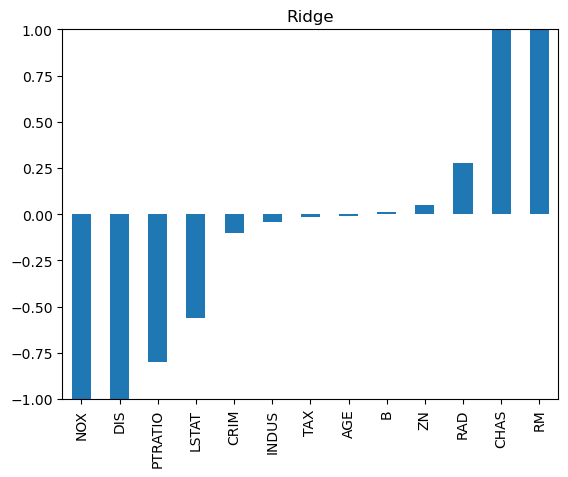

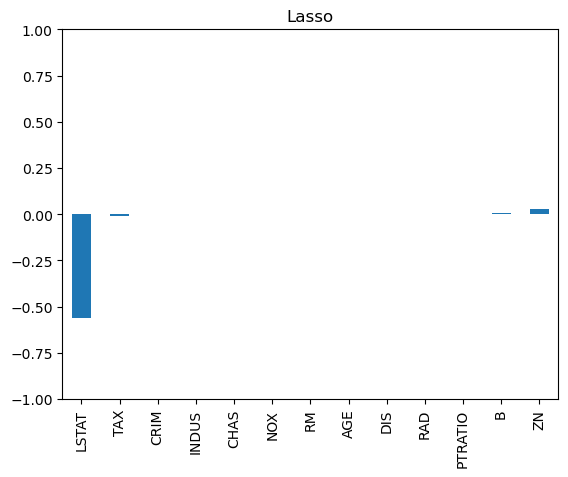

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#from sklearn.datasets import load_boston

"""
1. 사이킷런에 존재하는 데이터를 불러오고, 
   불러온 데이터를 학습용 데이터와 테스트용 데이터로 
   분리하여 반환하는 함수를 구현합니다.
"""

def load_bo():  
	data_url="http://lib.stat.cmu.edu/datasets/boston"  
	raw_df=pd.read_csv(data_url,sep="\s+",skiprows=22,header=None)  
	X=np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])  
	y=raw_df.values[1::2,2]  
	#X, y = load_boston(return_X_y = True)  
	feature_names=np.array(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD', 'TAX','PTRATIO','B','LSTAT'], dtype='<U7')

	return X,y ,feature_names

    
"""
2. 릿지(Ridge) 회귀를 구현하고, 
   전체 데이터를 바탕으로 학습시킨 모델을 
   반환하는 함수를 완성합니다.
"""
def Ridge_regression(X, y):
    
    ridge_reg = Ridge(alpha=10)
    
    ridge_reg.fit(X, y)
    
    return ridge_reg

"""
3. 라쏘(Lasso) 회귀를 구현하고, 
   전체 데이터를 바탕으로 학습시킨 모델을 
   반환하는 함수를 완성합니다.
"""
def Lasso_regression(X, y):
    
    lasso_reg = Lasso(alpha=10)
    
    lasso_reg.fit(X, y)
    
    return lasso_reg
    
# 각 변수의 beta_i 크기를 시각화하는 함수입니다.
def plot_graph(coef, title):
    fig = plt.figure()
    
    plt.ylim(-1,1)
    plt.title(title)
    coef.plot(kind='bar')

    plt.savefig("result.png")


def main():
    
    X,y,feature_names = load_bo()
    
    ridge_reg = Ridge_regression(X, y)
    lasso_reg = Lasso_regression(X, y)
    
    ## Ridge 회귀의 beta_i의 크기를 저장합니다.
    ridge_coef = pd.Series(ridge_reg.coef_, feature_names).sort_values()
    print("Ridge 회귀의 beta_i\n", ridge_coef)
    
    ## Lasso 회귀의 beta_i의 크기를 저장합니다.
    lasso_coef = pd.Series(lasso_reg.coef_, feature_names).sort_values()
    print("Lasso 회귀의 beta_i\n", lasso_coef)
    
    plot_graph(ridge_coef, 'Ridge')
    plot_graph(lasso_coef, 'Lasso')

if __name__=="__main__":
    main()


<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\302-28\AppData\Local\Temp\ipykernel_26004\747449407.py:16: SyntaxWarning: invalid escape sequence '\s'
  raw_df=pd.read_csv(data_url,sep="\s+",skiprows=22,header=None)


ElasticNet 회귀의 평가 점수: 0.7529261038422002

ElasticNet 회귀의 beta_i
 NOX       -12.156353
DIS        -1.458449
PTRATIO    -0.881076
LSTAT      -0.490034
CRIM       -0.079070
INDUS      -0.021011
TAX        -0.012515
AGE        -0.012100
B           0.009741
ZN          0.048669
RAD         0.277583
CHAS        2.985592
RM          3.697319
dtype: float64


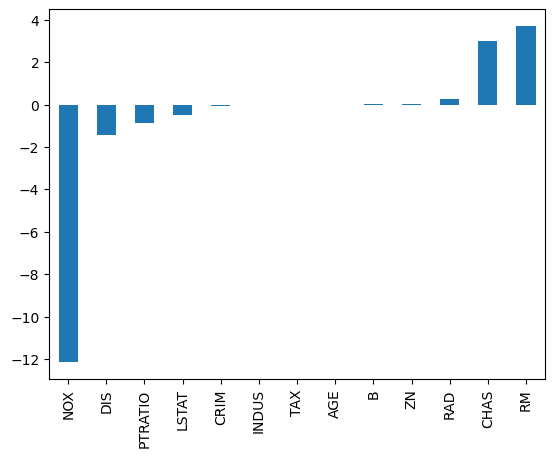

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_boston

"""
1. 사이킷런에 존재하는 데이터를 불러오고, 
   데이터와 변수 이름을 반환하는 함수를 구현합니다.
"""
def load_bo():  
	data_url="http://lib.stat.cmu.edu/datasets/boston"  
	raw_df=pd.read_csv(data_url,sep="\s+",skiprows=22,header=None)  
	X=np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])  
	y=raw_df.values[1::2,2]  
	#X, y = load_boston(return_X_y = True)  
	feature_names=np.array(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD', 'TAX','PTRATIO','B','LSTAT'], dtype='<U7')

	return X, y, feature_names

    
"""
2. 엘라스틱 넷(ElasticNet) 회귀를 구현하고, 
   학습용 데이터를 바탕으로 학습시킨 모델을 
   반환하는 함수를 완성합니다.
"""

def ElasticNet_regression(train_X, train_y):
    
    ElasticNet_reg = ElasticNet(alpha= 0.001, l1_ratio= 0.001)
    
    ElasticNet_reg.fit(train_X, train_y)
    
    return ElasticNet_reg
    
    
# 각 변수의 beta_i 크기를 시각화하는 함수입니다.
def plot_graph(coef):
    coef.plot(kind='bar')
    
    plt.savefig("result.png")
    
    
def main():
    
    X,y,feature_names = load_bo()
    
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2, random_state=100)
    
    elasticnet_reg = ElasticNet_regression(train_X, train_y)
    
    # 엘라스틱넷 회귀 모델 평가 점수 출력하기
    score = elasticnet_reg.score(test_X,test_y)
    print("ElasticNet 회귀의 평가 점수:", score)
    
    # 엘라스틱넷 회귀의 beta_i의 크기를 저장합니다.
    ElasticNet_coef = pd.Series(elasticnet_reg.coef_, feature_names).sort_values()
    print("\nElasticNet 회귀의 beta_i\n", ElasticNet_coef)
    
    plot_graph(ElasticNet_coef)
    
    return elasticnet_reg

if __name__=="__main__":
    main()


> RSS : <function return_RSS at 0x0000015E7AF5DD00>


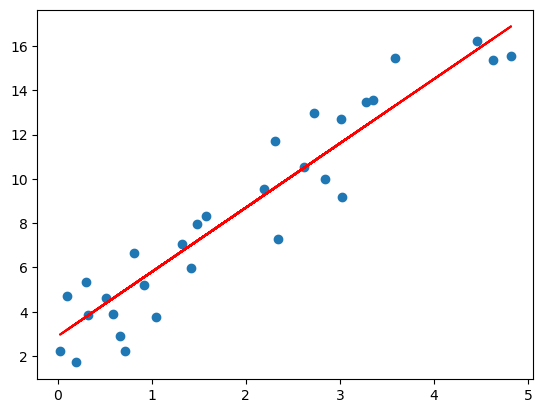

In [21]:
import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 X와 y를 생성하고, 학습용 데이터와 테스트용 데이터로 분리하여 반환하는 함수입니다.
def load_data():
    
    np.random.seed(0)
    
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
     
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3, random_state=0)
    
    return train_X, train_y, test_X, test_y

# 회귀 모델을 불러오고, 불러온 모델을 학습용 데이터에 맞춰 학습시켜 반환하는 함수입니다.
def Linear_Regression(train_X, train_y):
    
    lr = LinearRegression()
    
    lr.fit(train_X,train_y)
    
    return lr
    
"""
1. RSS(Residual Sum of Squares)를 계산하여
   반환하는 함수를 완성합니다.
"""
def return_RSS(test_y, predicted):
    
    RSS = 0
    for i in range(len(test_y)):
    
        a = test_y[i] - predicted[i]
        RSS += a**2
    
    return RSS
    
    
# 그래프로 시각화합니다.
def plotting_graph(test_X, test_y, predicted):
    plt.scatter(test_X,test_y)
    plt.plot(test_X, predicted, color='r')
    
    plt.savefig("result.png")

"""
3. 정의한 함수들을 이용하여 main() 함수를 완성합니다.
"""
def main():
    
    train_X, train_y, test_X, test_y = load_data()
     
    lr = Linear_Regression(train_X, train_y)
    
    predicted = lr.predict(test_X)
    
    RSS = return_RSS
    print("> RSS :",RSS)
    
    plotting_graph(test_X, test_y, predicted)

if __name__=="__main__":
    main()


> MSE : 2.0890663766577955
> MAE : 1.2208419845102045


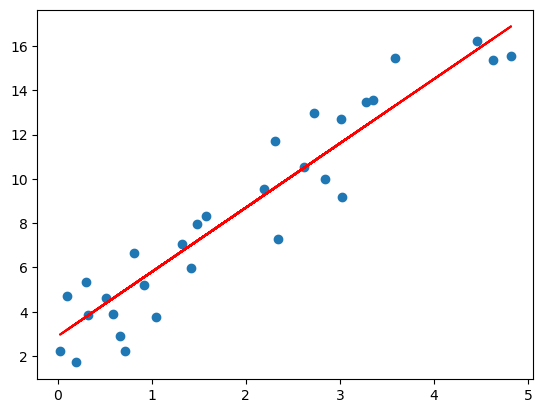

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# 데이터 X와 y를 생성하고, 학습용 데이터와 테스트용 데이터로 분리하여 반환하는 함수입니다.
def load_data():
    
    np.random.seed(0)
    
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
    
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3, random_state=0)
    
    return train_X, train_y, test_X, test_y

# 회귀 모델을 불러오고, 불러온 모델을 학습용 데이터에 맞춰 학습시켜 반환하는 함수입니다.
def Linear_Regression(train_X, train_y):
    
    lr = LinearRegression()
    
    lr.fit(train_X,train_y)
    
    return lr
    
# 그래프로 시각화합니다.
def plotting_graph(test_X, test_y, predicted):
    plt.scatter(test_X,test_y)
    plt.plot(test_X, predicted, color='r')
    
    plt.savefig("result.png")


"""
1. 정의한 함수들을 이용하여 main() 함수를 완성합니다.
   
   Step01. 생성한 데이터를 
           학습용 데이터와 테스트 데이터로 
           분리하여 반환하는 함수를 호출합니다.
           
   Step02. 학습용 데이터를 바탕으로 학습한 선형 회귀
           모델을 반환하는 함수를 호출합니다.
          
   Step03. 학습된 모델을 바탕으로 계산된 
           테스트 데이터의 예측값을 predicted에
           저장합니다.
           
   Step04. 회귀 알고리즘을 평가하기 위한 MSE, MAE 값을 
           각각 MSE,MAE 에 저장합니다.
"""
def main():
    
    train_X, train_y, test_X, test_y = load_data()
    
    lr = Linear_Regression(train_X, train_y)
    
    predicted = lr.predict(test_X)
    
    MAE = mean_absolute_error(test_y, predicted)
    MSE = mean_squared_error(test_y, predicted)
    
    print("> MSE :",MSE)
    print("> MAE :",MAE)
    
    plotting_graph(test_X, test_y, predicted)
    
    return MSE, MAE

if __name__=="__main__":
    main()


> R_squared : 0.8948735905242706


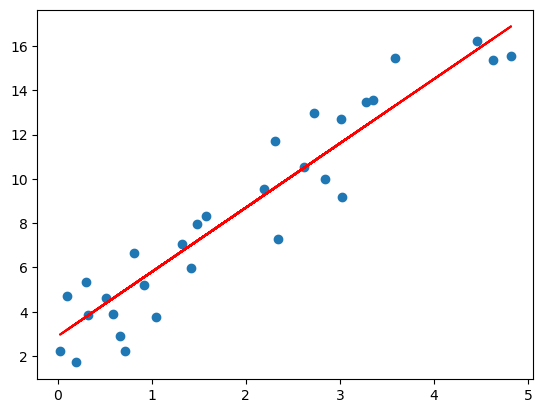

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

# 데이터 X와 y를 생성하고, 학습용 데이터와 테스트용 데이터로 분리하여 반환하는 함수입니다.
def load_data():
    
    np.random.seed(0)
    
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
    
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3, random_state=0)
    
    return train_X, train_y, test_X, test_y

# 회귀 모델을 불러오고, 불러온 모델을 학습용 데이터에 맞춰 학습시켜 반환하는 함수입니다.
def Linear_Regression(train_X, train_y):
    
    lr = LinearRegression()
    
    lr.fit(train_X,train_y)
    
    return lr
    
# 그래프로 시각화합니다.
def plotting_graph(test_X, test_y, predicted):
    plt.scatter(test_X,test_y)
    plt.plot(test_X, predicted, color='r')
    
    plt.savefig("result.png")

"""
1. 정의한 함수들을 이용하여 main() 함수를 완성합니다.
"""
def main():
    
    train_X, train_y, test_X, test_y = load_data()
    
    lr = Linear_Regression(train_X, train_y)
    
    predicted = lr.predict(test_X)
    
    R_squared  = r2_score(test_y, predicted)
    
    print("> R_squared :",R_squared)
    
    plotting_graph(test_X, test_y, predicted)
    
    return R_squared

if __name__=="__main__":
    main()
